# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall, accuracy, and F1-score in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision, recall, and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

$\text{F1-Score} = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$


At times, it may be superior to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
#Your code here
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

## 2. Create a standard logistic regression model

In [3]:
#Your code here
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
y_hat_train = log_reg.predict(X_train)
y_hat_test = log_reg.predict(X_test)

## 3. Write a function to calculate the precision

In [5]:
def precision(y_hat, y):
    #Your code here
    return (((y_hat+y)==2).sum())/(y_hat.sum())

## 4. Write a function to calculate the recall

In [6]:
def recall(y_hat, y):
    #Your code here
    return (((y_hat+y)==2).sum())/(y.sum())

## 5. Write a function to calculate the accuracy

In [7]:
def accuracy(y_hat, y):
    #Your code here
    return ((y_hat==y).sum())/len(y)

## 6. Write a function to calculate the F1-score

In [8]:
def f1_score(y_hat,y):
    #Your code here
    return 2*((precision(y_hat, y)*recall(y_hat, y))/(precision(y_hat, y)+recall(y_hat, y)))

## 7. Calculate the precision, recall, accuracy, and F1-score of your classifier.

Do this for both the train and the test set

In [9]:
#Your code here
print('Train set metrics')
print('Precision: {}'.format(precision(y_hat_train, y_train)))
print('Recall: {}'.format(recall(y_hat_train, y_train)))
print('Accuracy: {}'.format(accuracy(y_hat_train, y_train)))
print('F1 Score: {}'.format(f1_score(y_hat_train, y_train)))

Train set metrics
Precision: 0.8283582089552238
Recall: 0.8951612903225806
Accuracy: 0.8414096916299559
F1 Score: 0.8604651162790697


In [10]:
print('Test set metrics')
print('Precision: {}'.format(precision(y_hat_test, y_test)))
print('Recall: {}'.format(recall(y_hat_test, y_test)))
print('Accuracy: {}'.format(accuracy(y_hat_test, y_test)))
print('F1 Score: {}'.format(f1_score(y_hat_test, y_test)))

Test set metrics
Precision: 0.8409090909090909
Recall: 0.9024390243902439
Accuracy: 0.8552631578947368
F1 Score: 0.8705882352941177


Great Job! Now it's time to check your work with sklearn. 

## 8. Calculating Metrics with sklearn

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions with the sklearn functions above. Calculate these values for both your train and test set.

In [11]:
#Your code here
from sklearn import metrics

In [12]:
print('Train set metrics')
print('Precision: {}'.format(metrics.precision_score(y_train, y_hat_train)))
print('Recall: {}'.format(metrics.recall_score(y_train, y_hat_train)))
print('Accuracy: {}'.format(metrics.accuracy_score(y_train, y_hat_train)))
print('F1 Score: {}'.format(metrics.f1_score(y_train, y_hat_train)))

Train set metrics
Precision: 0.8283582089552238
Recall: 0.8951612903225806
Accuracy: 0.8414096916299559
F1 Score: 0.8604651162790697


In [13]:
print('Test set metrics')
print('Precision: {}'.format(metrics.precision_score(y_test, y_hat_test)))
print('Recall: {}'.format(metrics.recall_score(y_test, y_hat_test)))
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_hat_test)))
print('F1 Score: {}'.format(metrics.f1_score(y_test, y_hat_test)))

Test set metrics
Precision: 0.8409090909090909
Recall: 0.9024390243902439
Accuracy: 0.8552631578947368
F1 Score: 0.8705882352941177


## 9. Comparing Precision, Recall, Accuracy, and F1-Score of Test vs Train Sets


Calculate and then plot the precision, recall, accuracy, and F1-score for the test and train splits using different training set sizes. What do you notice?

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [15]:
# Your code here
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []
training_F1 = []
testing_F1 = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    
    training_Precision.append(metrics.precision_score(y_train, y_hat_train))
    testing_Precision.append(metrics.precision_score(y_test, y_hat_test))
    training_Recall.append(metrics.recall_score(y_train, y_hat_train))
    testing_Recall.append(metrics.recall_score(y_test, y_hat_test))
    training_Accuracy.append(metrics.accuracy_score(y_train, y_hat_train))
    testing_Accuracy.append(metrics.accuracy_score(y_test, y_hat_test))
    training_F1.append(metrics.f1_score(y_train, y_hat_train))
    testing_F1.append(metrics.f1_score(y_test, y_hat_test))

Create 4 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, test and train accuracy in the third one, and test and train f1-score in the fourth one.

In [16]:
split_sizes = list(range(10,95))

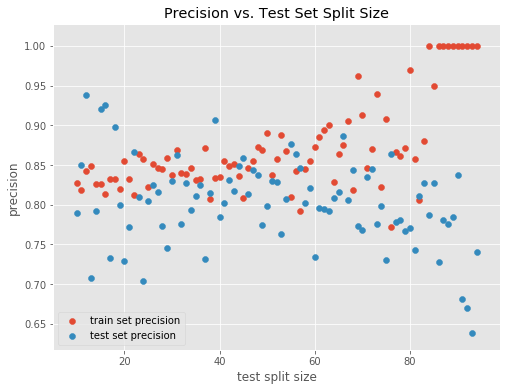

In [17]:
# code for test and train precision
plt.figure(figsize=(8,6))
plt.scatter(split_sizes, training_Precision, label='train set precision')
plt.scatter(split_sizes, testing_Precision, label='test set precision')
plt.title('Precision vs. Test Set Split Size')
plt.xlabel('test split size')
plt.ylabel('precision')
plt.legend(loc='lower left');

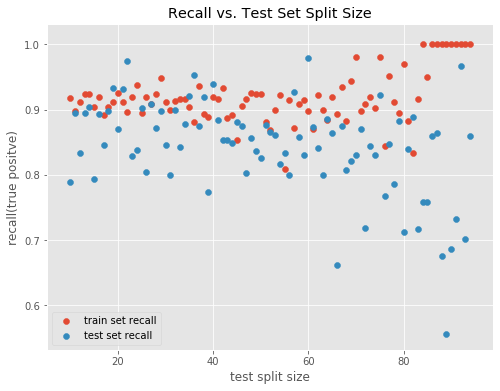

In [18]:
# code for test and train recall
plt.figure(figsize=(8,6))
plt.scatter(split_sizes, training_Recall, label='train set recall')
plt.scatter(split_sizes, testing_Recall, label='test set recall')
plt.title('Recall vs. Test Set Split Size')
plt.xlabel('test split size')
plt.ylabel('recall(true positve)')
plt.legend(loc='lower left');

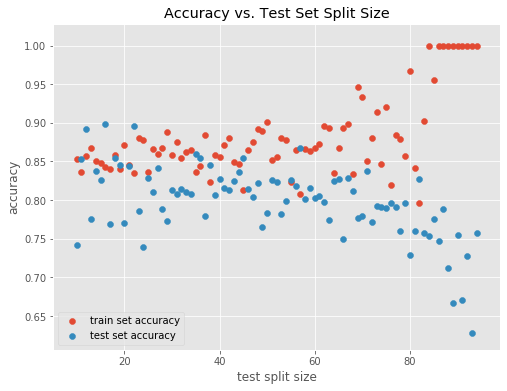

In [19]:
# code for test and train accuracy
plt.figure(figsize=(8,6))
plt.scatter(split_sizes, training_Accuracy, label='train set accuracy')
plt.scatter(split_sizes, testing_Accuracy, label='test set accuracy')
plt.title('Accuracy vs. Test Set Split Size')
plt.xlabel('test split size')
plt.ylabel('accuracy')
plt.legend(loc='lower left');

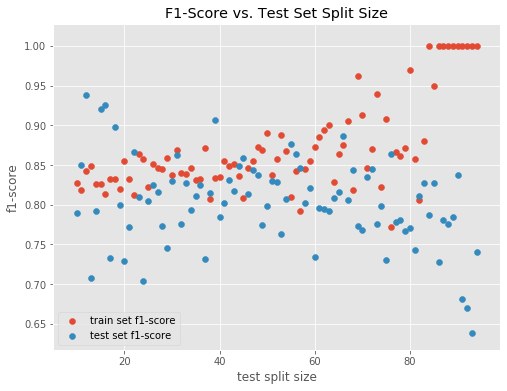

In [20]:
# code for test and train F1-score
plt.figure(figsize=(8,6))
plt.scatter(split_sizes, training_Precision, label='train set f1-score')
plt.scatter(split_sizes, testing_Precision, label='test set f1-score')
plt.title('F1-Score vs. Test Set Split Size')
plt.xlabel('test split size')
plt.ylabel('f1-score')
plt.legend(loc='lower left');

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.